# Softmax and Temperature

The softmax function is a 'softer' version of argmax. Argmax(x) returns the index of the largest element of a vector $x$; it can be thought of a transformation that zeroes out the entire vector $x$ except for the maximum element, which takes the new value 1. Softmax transforms a vector $x$ into values in the range $(0,1)$ with the properties that the sum of the elements is one, and the relative ordering of the elements does not change. The formula for softmax is

$$f(x_i) = \dfrac{e^{x_i}}{\sum_j e^{x_j}}$$

Each element of the vector is exponentiated, then the vector is normalized by dividing by the sum of the new elements. Because this vector contains positive values less than 1, which sum to 1, it can be interpreted as a probability distribution. When applied to a one-hot encoded categorical dataset, the highest probability elements corresponds to the most likely category, according to the model. Let's define softmax and see how it affects a randomly generated vector.

In [10]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def softmax(x):
    return np.exp(x)/np.sum(np.exp(x))

In [12]:
logits = np.random.poisson(10,[100,1]) + np.random.normal(0,0.2,[100,1])

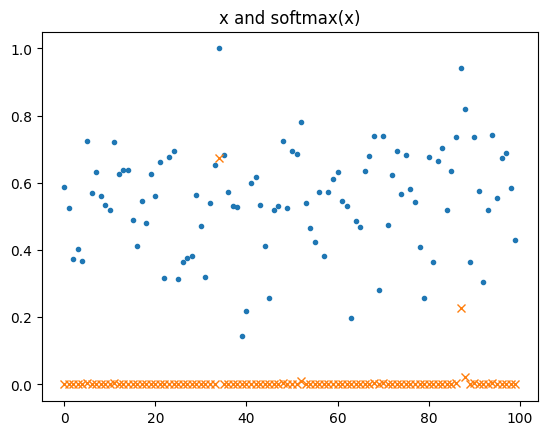

In [14]:
plt.plot(logits/np.max(logits), '.');
plt.plot(softmax(logits), 'x');
plt.title("x and softmax(x)");

Notice in the above plot, the maximum values of $x$ and softmax($x$) occur at the same indices, but softmax exaggerates the relationship so the max is easier to see. 

An interesting thing happens if we linearly scale $x$ before applying softmax. Since $e^x$ increases rapidly over any subset of its domain, softmax has the effect of exaggerating differences between larger values, moreso than it does with smaller values. For example, let's divide the elements of `logits` by 10 and apply softmax.

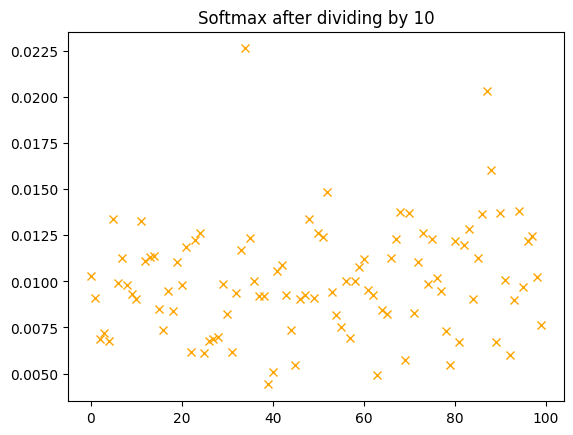

In [18]:
temperature = 10
scaled_logits = logits / temperature
plt.plot(softmax(scaled_logits), 'x', c='orange');
plt.title("Softmax after dividing by 10");

Now let's multiply by 10 and apply softmax

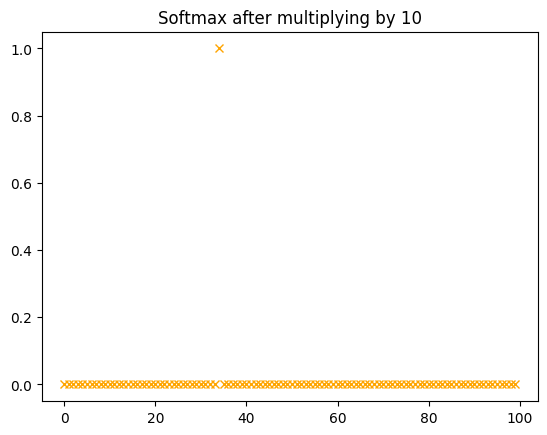

In [19]:
temperature = 0.1
scaled_logits = logits / temperature
plt.plot(softmax(scaled_logits), 'x', c='orange');
plt.title("Softmax after multiplying by 10");

When the $x$ vector values are relatively larger, the softmax function exacerbates that difference. This feature is exploited in generative RNN models with a concept called 'temperature'. When a categorical model outputs a probability distribution over possible outputs, we can make that probability distribution closer to, or further from, uniform by applying a temperature scaling and a softmax. A temperature of '1' would have no effect; a temperature of '0.1' strongly accentuates the most probable output; a temperature of '10' pushes the distribution very close to uniform. The further the distribution is from uniform, the more deterministic and predictable the model outputs will be. This is because when we generate output from an RNN, we use the probability distribution to randomly select the output. The more skewed the distribution is towards one output, the less random the model's output will be.

Softmax also explains where the term 'logits' comes from. These are the raw outputs of a neural network, before softmax exponentiation is applied. So they are logarithmic units: logits. (Acutally there seems to be some disagreement about the etymology. It might be closer to 'logistic units'. But people definitely talk about the 'log' part being the inverse of exponentiation. And it works as a mnemonic, even if it is a backtymology.)